In [1]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nreached 99% accuracy so cancelling training:")
            self.model.stop_training=True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [3]:
mnist=tf.keras.datasets.mnist
mnist

<module 'tensorflow.keras.datasets.mnist' from '/home/hemanth/.local/lib/python3.8/site-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape ### 60000 Array and 28 rows and 28 columns

(60000, 28, 28)

In [6]:
y_train.shape # 60000 class label

(60000,)

In [7]:
x_train,x_test=x_train/255.0,x_test/255.0


In [8]:
callbacks=myCallback()

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [11]:
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3470 - accuracy: 0.8965
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0819 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0492 - accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9919

reached 99% accuracy so cancelling training:


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


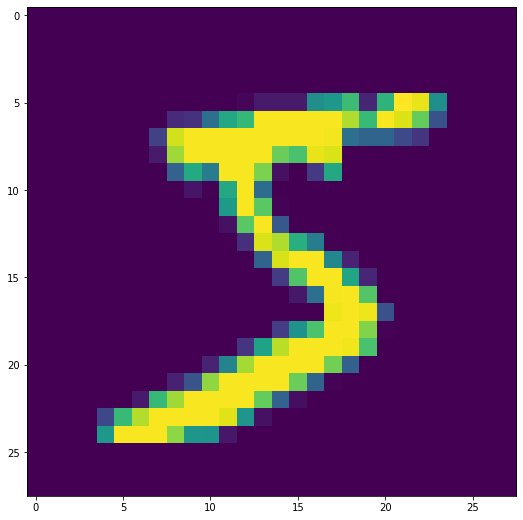

In [15]:
plt.figure(figsize=(16,9))
plt.imshow(x_train[0])

In [16]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_image,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [17]:
train_image.shape

(60000, 28, 28)

In [18]:
Class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [19]:
len(train_image)

60000

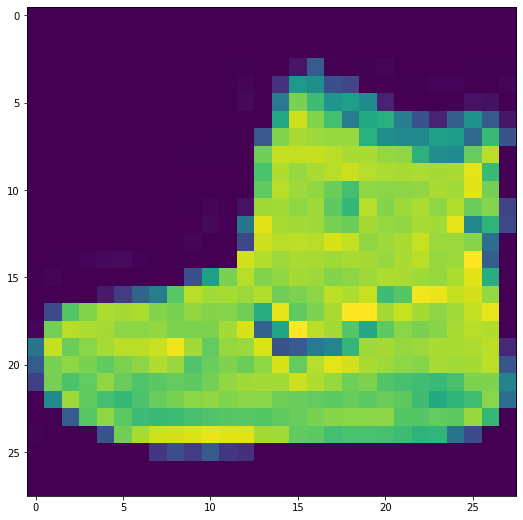

In [20]:
plt.figure(figsize=(16,9))
plt.imshow(train_image[0])


In [21]:
train_image=train_image/255.0
test_images=test_images/255.0

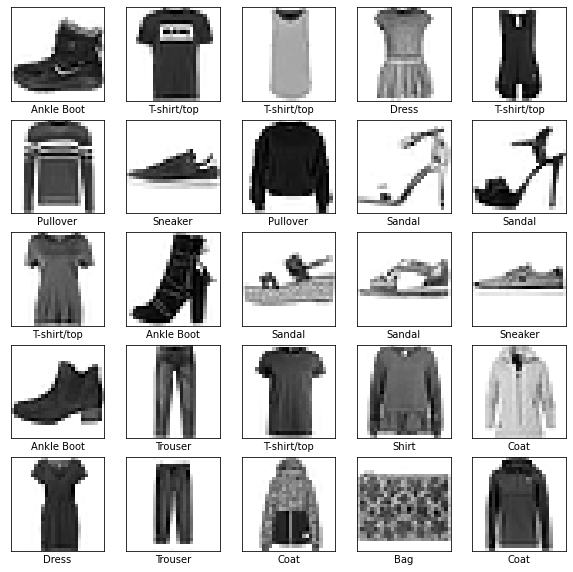

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i],cmap=plt.cm.binary)
    plt.xlabel(Class_names[train_labels[i]])
plt.show()

In [23]:
np.set_printoptions(linewidth=150)
print(train_image[0])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.

In [24]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [26]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [27]:
model.fit(train_image,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7130 - accuracy: 0.7567
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6298 - accuracy: 0.8313
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6149 - accuracy: 0.8465
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6088 - accuracy: 0.8524
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5990 - accuracy: 0.8627
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5968 - accuracy: 0.8644
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5927 - accuracy: 0.8686
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5904 - accuracy: 0.8704
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5860 - accuracy: 0.8746
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.584

In [28]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest Accuracy',test_acc)

313/313 - 1s - loss: 1.5945 - accuracy: 0.8658

Test Accuracy 0.8658000230789185


In [31]:
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [32]:
prediction=probability_model.predict(test_images)

In [33]:
prediction[0]

array([0.08533676, 0.08533676, 0.08533676, 0.08533676, 0.08533676, 0.08533678, 0.08533676, 0.08533689, 0.08533676, 0.23196898], dtype=float32)

In [35]:
np.argmax(prediction[0])

9

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as layers
import tensorflow.keras as keras

In [39]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_image,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [37]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [38]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )